In [8]:
%matplotlib inline
from graphdatascience import GraphDataScience
from neomodel import config
import os
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from src.models.simple_graph import *
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


database = input("Database name: ")
if os.path.exists("data/config.json"):
    with open("data/config.json") as config_file:
        config_data = json.loads(config_file.read())
        if "csv_path" in config_data:
            csv_path = config_data["csv_path"]
        if "username" in config_data:
            username = config_data["username"]
        if "password" in config_data:
            password = config_data["password"]
        if "host" in config_data:
            host = config_data["host"]
        if "database" in config_data:
            database = config_data["database"]
        if "port" in config_data:
            port = config_data["port"]

config.DATABASE_URL = f"bolt://{username}:{password}@{host}:{port}/{database}"

In [28]:
X = []
y = []

with open(csv_path) as mimic_data:
    num_lines = 0
    for line in mimic_data:
        num_lines += 1

with open(csv_path) as mimic_data:
    i = 0
    for line in tqdm(mimic_data, total=num_lines, desc="Load data from input file..."):
        i += 1
        entry = line.strip().replace('"', "").split(",")

        if i == 1:
            continue

        # Get visit ID and LOS label
        visit_id = entry[0]
        los_over = entry[5]

        # Get visit node from Neo4j so we can get the embedding
        visit = Visit.nodes.get(visit_id = visit_id)

        # Add embedding and label to lists
        X.append(visit.embedding)
        y.append(los_over)

Load data from input file...: 100%|███████████████| 43959/43959 [17:54<00:00, 40.93it/s]


In [62]:
tsne = None
tsne_results = None

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000, learning_rate="auto", init="pca")
tsne_results = tsne.fit_transform(np.array(X))

df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['los6'] = y

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 43958 samples in 0.002s...
[t-SNE] Computed neighbors for 43958 samples in 2.537s...
[t-SNE] Computed conditional probabilities for sample 1000 / 43958
[t-SNE] Computed conditional probabilities for sample 2000 / 43958
[t-SNE] Computed conditional probabilities for sample 3000 / 43958
[t-SNE] Computed conditional probabilities for sample 4000 / 43958
[t-SNE] Computed conditional probabilities for sample 5000 / 43958
[t-SNE] Computed conditional probabilities for sample 6000 / 43958
[t-SNE] Computed conditional probabilities for sample 7000 / 43958
[t-SNE] Computed conditional probabilities for sample 8000 / 43958
[t-SNE] Computed conditional probabilities for sample 9000 / 43958
[t-SNE] Computed conditional probabilities for sample 10000 / 43958
[t-SNE] Computed conditional probabilities for sample 11000 / 43958
[t-SNE] Computed conditional probabilities for sample 12000 / 43958
[t-SNE] Computed conditional probabilities for sa

/home/wade@refactorhealth.com/miniconda3/envs/neo4jmimic/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.338970
[t-SNE] KL divergence after 1000 iterations: -1.125661


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

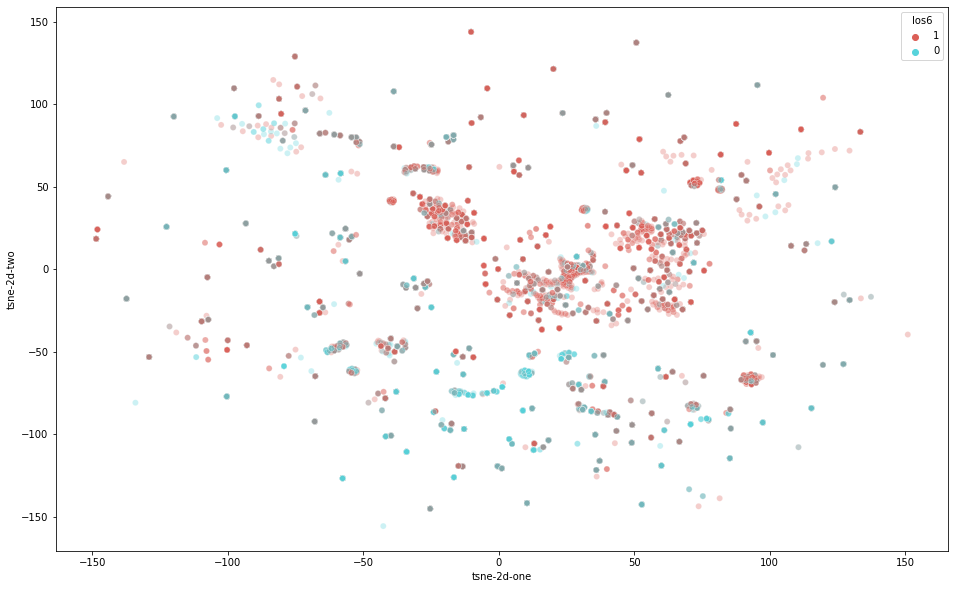

In [60]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="los6",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)